In [1]:
from stats_can import StatsCan

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#seaborn theme
import seaborn as sns
sns.set(font='Gill Sans MT')

In [2]:
sc = StatsCan()

In [3]:
df = sc.table_to_df('14-10-0378-01')
#sc.update_tables()


In [4]:
df = sc.table_to_df('14-10-0378-01')


In [5]:
df

,REF_DATE,GEO,DGUID,Labour force characteristics,Sex,Age group,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2006-01-01,"Belleville, Ontario",2016S0503522,Population,Both sexes,15 years and over,Persons,249,thousands,3,v1242102619,36.1.1.1,81.2,NaN,NaN,NaN,1
1,2006-01-01,"Belleville, Ontario",2016S0503522,Population,Both sexes,15 to 24 years,Persons,249,thousands,3,v1242102620,36.1.1.2,12.2,NaN,NaN,NaN,1
2,2006-01-01,"Belleville, Ontario",2016S0503522,Population,Both sexes,25 years and over,Persons,249,thousands,3,v1242102621,36.1.1.3,69.0,NaN,NaN,NaN,1
3,2006-01-01,"Belleville, Ontario",2016S0503522,Population,Both sexes,25 to 44 years,Persons,249,thousands,3,v1242102622,36.1.1.4,27.4,NaN,NaN,NaN,1
4,2006-01-01,"Belleville, Ontario",2016S0503522,Population,Both sexes,45 years and over,Persons,249,thousands,3,v1242102623,36.1.1.5,41.7,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1898635,2021-12-01,"Victoria, British Columbia",2016S0503935,Employment rate,Females,45 years and over,Percentage,242,units,0,v1242102614,35.10.3.5,39.4,NaN,NaN,NaN,1
1898636,2021-12-01,"Victoria, British Columbia",2016S0503935,Employment rate,Females,25 to 54 years,Percentage,242,units,0,v1242102615,35.10.3.6,86.3,NaN,NaN,NaN,1
1898637,2021-12-01,"Victoria, British Columbia",2016S0503935,Employment rate,Females,55 years and over,Percentage,242,units,0,v1242102616,35.10.3.7,27.0,NaN,NaN,NaN,1
1898638,2021-12-01,"Victoria, British Columbia",2016S0503935,Employment rate,Females,55 to 64 years,Percentage,242,units,0,v1242102617,35.10.3.8,51.7,NaN,NaN,NaN,1


In [6]:
calgary = df[df['GEO']=="Calgary, Alberta"]

In [7]:
calgary = calgary[calgary['Sex']=='Both sexes']
calgary


,REF_DATE,GEO,DGUID,Labour force characteristics,Sex,Age group,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
8910,2006-03-01,"Calgary, Alberta",2016S0503825,Population,Both sexes,15 years and over,Persons,249,thousands,3,v1242100999,30.1.1.1,897.6,NaN,NaN,NaN,1
8911,2006-03-01,"Calgary, Alberta",2016S0503825,Population,Both sexes,15 to 24 years,Persons,249,thousands,3,v1242101000,30.1.1.2,158.7,NaN,NaN,NaN,1
8912,2006-03-01,"Calgary, Alberta",2016S0503825,Population,Both sexes,25 years and over,Persons,249,thousands,3,v1242101001,30.1.1.3,738.9,NaN,NaN,NaN,1
8913,2006-03-01,"Calgary, Alberta",2016S0503825,Population,Both sexes,25 to 44 years,Persons,249,thousands,3,v1242101002,30.1.1.4,367.1,NaN,NaN,NaN,1
8914,2006-03-01,"Calgary, Alberta",2016S0503825,Population,Both sexes,45 years and over,Persons,249,thousands,3,v1242101003,30.1.1.5,371.8,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1897267,2021-12-01,"Calgary, Alberta",2016S0503825,Employment rate,Both sexes,45 years and over,Percentage,242,units,0,v1242101246,30.10.1.5,55.8,NaN,NaN,NaN,1
1897268,2021-12-01,"Calgary, Alberta",2016S0503825,Employment rate,Both sexes,25 to 54 years,Percentage,242,units,0,v1242101247,30.10.1.6,82.4,NaN,NaN,NaN,1
1897269,2021-12-01,"Calgary, Alberta",2016S0503825,Employment rate,Both sexes,55 years and over,Percentage,242,units,0,v1242101248,30.10.1.7,40.7,NaN,NaN,NaN,1
1897270,2021-12-01,"Calgary, Alberta",2016S0503825,Employment rate,Both sexes,55 to 64 years,Percentage,242,units,0,v1242101249,30.10.1.8,67.5,NaN,NaN,NaN,1


In [8]:
calgary['Labour force characteristics'].unique()

['Population', 'Labour force', 'Employment', 'Full-time employment', 'Part-time employment', 'Unemployment', 'Not in labour force', 'Unemployment rate', 'Participation rate', 'Employment rate']
Categories (10, object): ['Population', 'Labour force', 'Employment', 'Full-time employment', ..., 'Not in labour force', 'Unemployment rate', 'Participation rate', 'Employment rate']

In [9]:
calgary['Age group'].unique()

['15 years and over', '15 to 24 years', '25 years and over', '25 to 44 years', '45 years and over', '25 to 54 years', '55 years and over', '55 to 64 years', '65 years and over']
Categories (9, object): ['15 years and over', '15 to 24 years', '25 years and over', '25 to 44 years', ..., '25 to 54 years', '55 years and over', '55 to 64 years', '65 years and over']

In [10]:
#filter out non relevant information
calgary = calgary.filter(items = ['REF_DATE','Labour force characteristics','Age group','UOM', 'VALUE'])

In [11]:
calgary.rename(columns={'REF_DATE':'Date'},inplace=True)

In [12]:
cal_unadj = calgary[(calgary['UOM']=='Persons') ]

In [13]:
cal_tot = cal_unadj[cal_unadj['Age group']=='15 years and over']

cal_pivot = cal_tot.pivot(index='Date', columns = ['Labour force characteristics'],values ='VALUE')
cal_pivot

Labour force characteristics,Population,Labour force,Employment,Full-time employment,Part-time employment,Unemployment,Not in labour force
Date,,,,,,,
2006-03-01,897.6,669.2,646.1,547.5,98.6,23.1,228.4
2006-04-01,900.1,674.6,655.1,555.3,99.9,19.4,225.5
2006-05-01,902.7,686.0,664.5,567.3,97.2,21.5,216.7
2006-06-01,905.3,693.6,671.7,575.8,95.9,21.8,211.8
2006-07-01,908.2,701.4,676.8,586.7,90.1,24.6,206.8
...,...,...,...,...,...,...,...
2021-08-01,1266.4,903.2,812.1,663.2,149.0,91.1,363.2
2021-09-01,1268.3,905.3,821.2,669.9,151.3,84.1,363.0
2021-10-01,1270.5,910.8,834.7,681.1,153.6,76.1,359.7


In [14]:
cal_15to24 = cal_unadj[cal_unadj['Age group']=='15 to 24 years']

cal_15to24_pivot =cal_15to24.pivot(index='Date', columns = ['Labour force characteristics'],values ='VALUE')

In [15]:
cal_pivot.unstack()

Labour force characteristics  Date      
Population                    2006-03-01    897.6
                              2006-04-01    900.1
                              2006-05-01    902.7
                              2006-06-01    905.3
                              2006-07-01    908.2
                                            ...  
Not in labour force           2021-08-01    363.2
                              2021-09-01    363.0
                              2021-10-01    359.7
                              2021-11-01    366.5
                              2021-12-01    370.7
Length: 1330, dtype: float64

In [16]:
cal_pivot.columns=cal_pivot.columns.tolist()
cal_pivot['Participation Rate']=(cal_pivot['Labour force']/cal_pivot['Population'])*100
cal_pivot['Unemployment Rate']=(cal_pivot['Unemployment']/cal_pivot['Labour force'])*100
cal_pivot['Employment Rate']=(cal_pivot['Employment']/cal_pivot['Labour force'])*100
cal_pivot

,Population,Labour force,Employment,Full-time employment,Part-time employment,Unemployment,Not in labour force,Participation Rate,Unemployment Rate,Employment Rate
Date,,,,,,,,,,
2006-03-01,897.6,669.2,646.1,547.5,98.6,23.1,228.4,74.554367,3.451883,96.548117
2006-04-01,900.1,674.6,655.1,555.3,99.9,19.4,225.5,74.947228,2.875778,97.109398
2006-05-01,902.7,686.0,664.5,567.3,97.2,21.5,216.7,75.994240,3.134111,96.865889
2006-06-01,905.3,693.6,671.7,575.8,95.9,21.8,211.8,76.615487,3.143022,96.842561
2006-07-01,908.2,701.4,676.8,586.7,90.1,24.6,206.8,77.229685,3.507271,96.492729
...,...,...,...,...,...,...,...,...,...,...
2021-08-01,1266.4,903.2,812.1,663.2,149.0,91.1,363.2,71.320278,10.086360,89.913640
2021-09-01,1268.3,905.3,821.2,669.9,151.3,84.1,363.0,71.379011,9.289738,90.710262
2021-10-01,1270.5,910.8,834.7,681.1,153.6,76.1,359.7,71.688312,8.355292,91.644708


In [17]:
cal_pivot['Labour force']/cal_pivot['Population']

Date
2006-03-01    0.745544
2006-04-01    0.749472
2006-05-01    0.759942
2006-06-01    0.766155
2006-07-01    0.772297
                ...   
2021-08-01    0.713203
2021-09-01    0.713790
2021-10-01    0.716883
2021-11-01    0.712075
2021-12-01    0.709346
Length: 190, dtype: float64

In [18]:
cal_pivot['2019':]

,Population,Labour force,Employment,Full-time employment,Part-time employment,Unemployment,Not in labour force,Participation Rate,Unemployment Rate,Employment Rate
Date,,,,,,,,,,
2019-01-01,1211.1,870.9,810.0,652.4,157.6,61.0,340.2,71.909834,7.004248,93.007234
2019-02-01,1213.1,877.5,812.9,650.9,162.0,64.6,335.6,72.335339,7.361823,92.638177
2019-03-01,1215.2,884.1,816.0,655.8,160.2,68.1,331.1,72.753456,7.702749,92.297251
2019-04-01,1217.1,894.9,829.6,670.6,159.0,65.4,322.2,73.527237,7.308079,92.703095
2019-05-01,1219.3,900.1,840.1,685.3,154.9,60.0,319.1,73.821045,6.665926,93.334074
2019-06-01,1221.5,910.0,850.4,703.0,147.4,59.6,311.5,74.498567,6.549451,93.450549
2019-07-01,1223.9,913.0,851.8,709.3,142.6,61.1,310.9,74.597598,6.692223,93.296824
2019-08-01,1226.1,916.1,845.8,712.5,133.2,70.3,310.1,74.716581,7.673835,92.326165
2019-09-01,1228.6,912.1,843.4,700.6,142.7,68.8,316.5,74.238971,7.543033,92.467931


In [19]:
cal_pivot.diff(12)['2019':]

,Population,Labour force,Employment,Full-time employment,Part-time employment,Unemployment,Not in labour force,Participation Rate,Unemployment Rate,Employment Rate
Date,,,,,,,,,,
2019-01-01,24.6,2.4,6.9,0.7,6.2,-4.4,22.1,-1.288649,-0.525976,0.537458
2019-02-01,24.8,4.0,7.6,-5.8,13.4,-3.6,20.8,-1.173034,-0.445847,0.445847
2019-03-01,25.0,13.0,16.4,0.5,15.9,-3.4,12.0,-0.435924,-0.505264,0.505264
2019-04-01,24.9,26.3,28.4,15.8,12.6,-2.0,-1.4,0.670334,-0.451534,0.462708
2019-05-01,24.9,29.9,35.6,24.6,11.0,-5.7,-5.0,0.964380,-0.884063,0.884063
2019-06-01,25.0,40.7,45.1,39.1,6.0,-4.4,-15.7,1.844994,-0.812795,0.812795
2019-07-01,25.2,45.5,52.5,48.8,3.8,-7.1,-20.3,2.227530,-1.169448,1.158495
2019-08-01,25.2,47.8,50.9,56.0,-5.2,-3.1,-22.5,2.412476,-0.779465,0.779465
2019-09-01,25.6,41.1,46.4,47.3,-1.0,-5.2,-15.5,1.836644,-0.952949,0.963913


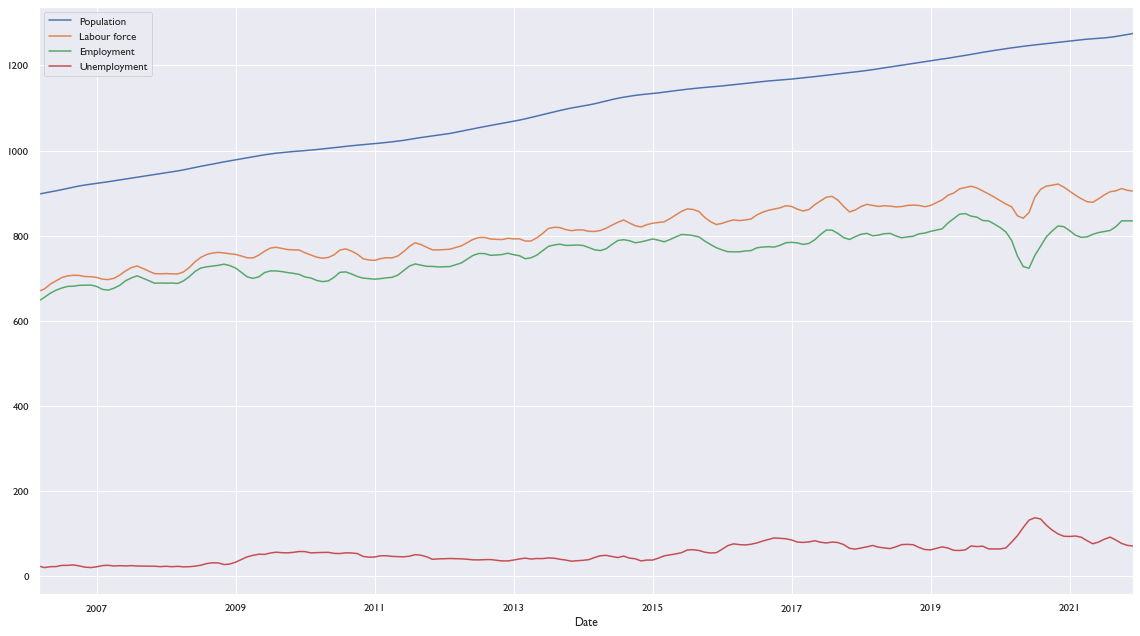

In [20]:
cal_pivot[['Population','Labour force', 'Employment','Unemployment']].plot(figsize = (16,9),kind='line')
plt.tight_layout()

<AxesSubplot:title={'center':'Total Unemployment Numbers, Calgary CMA'}, xlabel='Date'>

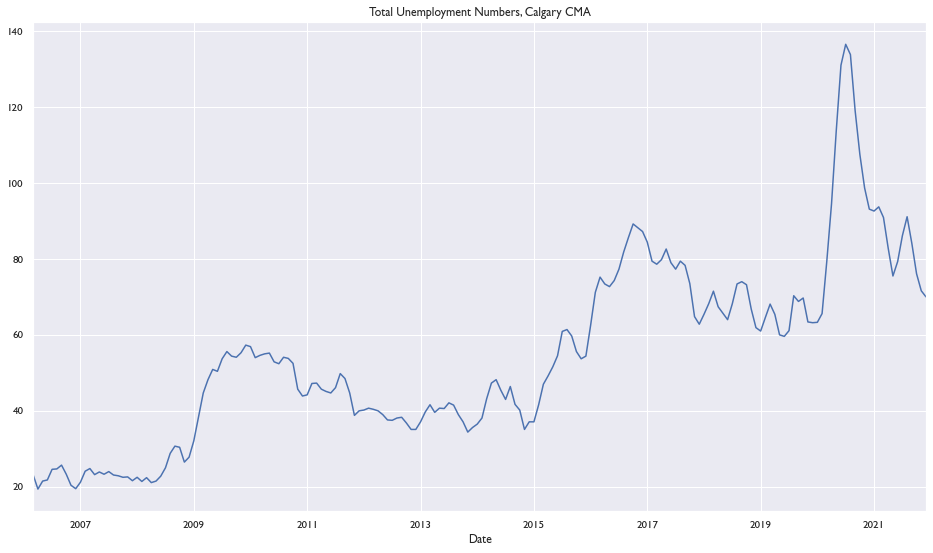

In [21]:
cal_pivot['Unemployment'].plot(figsize = (16,9),kind='line', title = 'Total Unemployment Numbers, Calgary CMA')

<AxesSubplot:title={'center':'Total Employment Numbers, Calgary CMA'}, xlabel='Date'>

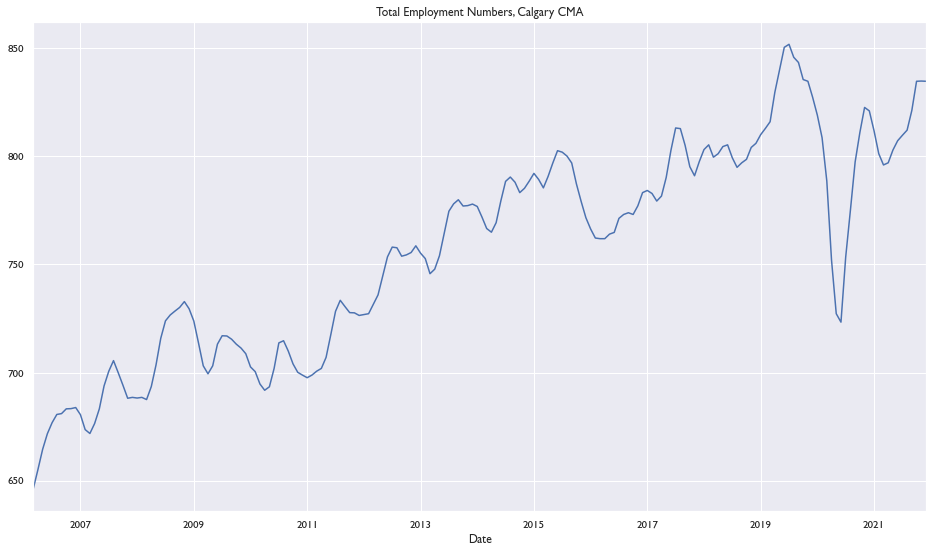

In [23]:
cal_pivot['Employment'].plot(figsize = (16,9),kind='line', title = 'Total Employment Numbers, Calgary CMA')

In [24]:
cal_pivot['Employment']['2019':]

Date
2019-01-01    810.0
2019-02-01    812.9
2019-03-01    816.0
2019-04-01    829.6
2019-05-01    840.1
2019-06-01    850.4
2019-07-01    851.8
2019-08-01    845.8
2019-09-01    843.4
2019-10-01    835.5
2019-11-01    834.7
2019-12-01    827.3
2020-01-01    819.0
2020-02-01    808.6
2020-03-01    788.6
2020-04-01    752.0
2020-05-01    727.2
2020-06-01    723.3
2020-07-01    753.4
2020-08-01    775.1
2020-09-01    797.4
2020-10-01    811.0
2020-11-01    822.6
2020-12-01    821.0
2021-01-01    811.8
2021-02-01    801.2
2021-03-01    796.0
2021-04-01    797.0
2021-05-01    802.9
2021-06-01    807.2
2021-07-01    809.7
2021-08-01    812.1
2021-09-01    821.2
2021-10-01    834.7
2021-11-01    834.8
2021-12-01    834.7
Name: Employment, dtype: float64

In [25]:
cal_pivot['Employment']['2018':'2021'].pct_change(12)

Date
2018-01-01         NaN
2018-02-01         NaN
2018-03-01         NaN
2018-04-01         NaN
2018-05-01         NaN
2018-06-01         NaN
2018-07-01         NaN
2018-08-01         NaN
2018-09-01         NaN
2018-10-01         NaN
2018-11-01         NaN
2018-12-01         NaN
2019-01-01    0.008592
2019-02-01    0.009437
2019-03-01    0.020510
2019-04-01    0.035447
2019-05-01    0.044251
2019-06-01    0.056004
2019-07-01    0.065682
2019-08-01    0.064033
2019-09-01    0.058218
2019-10-01    0.046206
2019-11-01    0.038055
2019-12-01    0.026427
2020-01-01    0.011111
2020-02-01   -0.005290
2020-03-01   -0.033578
2020-04-01   -0.093539
2020-05-01   -0.134389
2020-06-01   -0.149459
2020-07-01   -0.115520
2020-08-01   -0.083590
2020-09-01   -0.054541
2020-10-01   -0.029324
2020-11-01   -0.014496
2020-12-01   -0.007615
2021-01-01   -0.008791
2021-02-01   -0.009152
2021-03-01    0.009384
2021-04-01    0.059840
2021-05-01    0.104098
2021-06-01    0.115996
2021-07-01    0.074728
2021-0

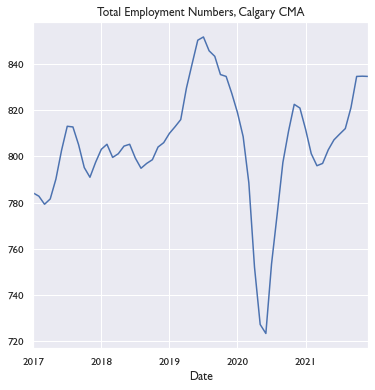

In [27]:
cal_pivot['Employment']['2017':].plot(figsize = (6,6),kind='line', title = 'Total Employment Numbers, Calgary CMA')

plt.savefig('cal_cma_employment.png')

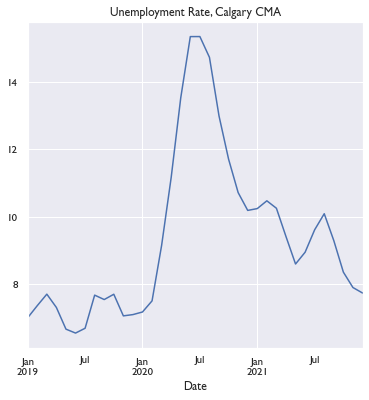

In [28]:
cal_pivot['Unemployment Rate']['2019':].plot(figsize = (6,6),kind='line', title = 'Unemployment Rate, Calgary CMA')
plt.savefig('cal_cma_unemploy_small.png')

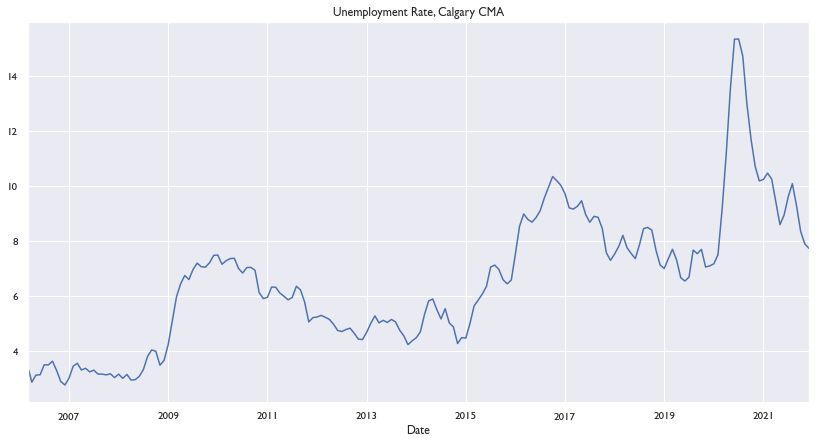

In [29]:
cal_pivot['Unemployment Rate'].plot(figsize=(14,7), title='Unemployment Rate, Calgary CMA')
plt.savefig('cal_cma_unemployment.png')

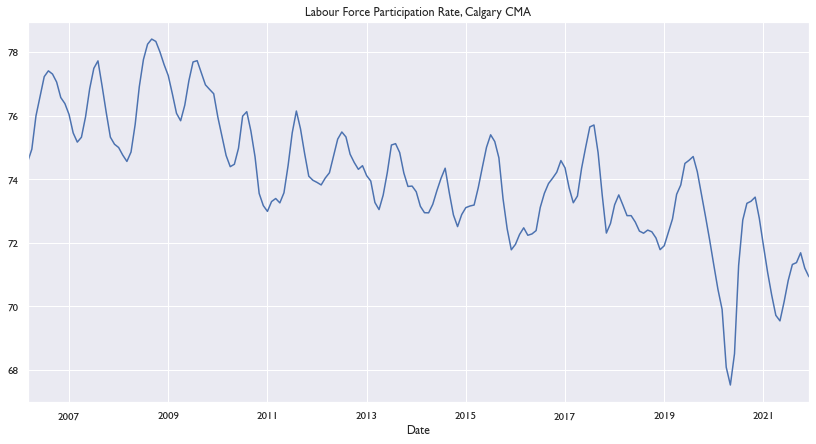

In [30]:
cal_pivot['Participation Rate'].plot(figsize=(14,7), title='Labour Force Participation Rate, Calgary CMA')
plt.savefig('cal_cma_participation_rate.png')

In [31]:


cal_15to24_pivot.columns=cal_15to24_pivot.columns.tolist()
cal_15to24_pivot['Participation Rate']=(cal_15to24_pivot['Labour force']/cal_15to24_pivot['Population'])*100
cal_15to24_pivot['Unemployment Rate']=(cal_15to24_pivot['Unemployment']/cal_15to24_pivot['Labour force'])*100
cal_15to24_pivot['Employment Rate']=(cal_15to24_pivot['Employment']/cal_15to24_pivot['Labour force'])*100
cal_15to24_pivot

,Population,Labour force,Employment,Full-time employment,Part-time employment,Unemployment,Not in labour force,Participation Rate,Unemployment Rate,Employment Rate
Date,,,,,,,,,,
2006-03-01,158.7,110.2,103.1,60.7,42.4,7.1,48.5,69.439193,6.442831,93.557169
2006-04-01,161.4,114.5,108.9,65.6,43.4,5.6,46.9,70.941760,4.890830,95.109170
2006-05-01,164.1,119.7,111.4,71.5,39.9,8.3,44.4,72.943327,6.934002,93.065998
2006-06-01,164.8,121.8,112.9,77.9,34.9,8.9,43.0,73.907767,7.307061,92.692939
2006-07-01,166.4,129.0,118.3,88.1,30.2,10.7,37.5,77.524038,8.294574,91.705426
...,...,...,...,...,...,...,...,...,...,...
2021-08-01,181.8,123.3,97.7,54.5,43.3,25.6,58.5,67.821782,20.762368,79.237632
2021-09-01,182.5,118.5,96.4,51.6,44.9,22.1,63.9,64.931507,18.649789,81.350211
2021-10-01,184.3,113.5,95.0,47.1,47.9,18.6,70.7,61.584373,16.387665,83.700441


In [32]:
cal_15to24_pivot['2019':]

,Population,Labour force,Employment,Full-time employment,Part-time employment,Unemployment,Not in labour force,Participation Rate,Unemployment Rate,Employment Rate
Date,,,,,,,,,,
2019-01-01,182.1,104.9,94.1,46.5,47.6,10.9,77.2,57.605711,10.390848,89.704480
2019-02-01,185.7,108.2,96.6,45.2,51.4,11.7,77.5,58.266020,10.813309,89.279113
2019-03-01,186.9,110.7,98.4,47.3,51.1,12.3,76.1,59.229535,11.111111,88.888889
2019-04-01,185.1,111.6,100.2,48.7,51.5,11.4,73.5,60.291734,10.215054,89.784946
2019-05-01,183.8,113.2,102.7,52.1,50.6,10.5,70.6,61.588683,9.275618,90.724382
2019-06-01,181.0,117.2,104.2,58.0,46.2,13.0,63.8,64.751381,11.092150,88.907850
2019-07-01,183.0,125.3,109.2,63.1,46.1,16.1,57.7,68.469945,12.849162,87.150838
2019-08-01,181.3,130.9,111.9,70.1,41.8,18.9,50.4,72.200772,14.438503,85.485103
2019-09-01,180.5,126.7,108.7,63.7,45.0,17.9,53.8,70.193906,14.127861,85.793212


In [33]:
cal_15to24_pivot.diff(12)['2019':]

,Population,Labour force,Employment,Full-time employment,Part-time employment,Unemployment,Not in labour force,Participation Rate,Unemployment Rate,Employment Rate
Date,,,,,,,,,,
2019-01-01,17.9,3.8,5.3,2.7,2.6,-1.4,14.1,-3.965543,-1.775324,1.870653
2019-02-01,18.8,4.6,5.6,0.1,5.5,-0.9,14.2,-3.807077,-1.348853,1.441275
2019-03-01,18.1,6.7,8.7,3.0,5.7,-2.0,11.3,-2.381840,-2.638889,2.638889
2019-04-01,13.7,8.7,11.1,5.0,6.1,-2.4,5.0,0.256728,-3.196025,3.196025
2019-05-01,10.9,7.0,11.5,4.8,6.7,-4.5,3.8,0.165896,-4.848675,4.848675
2019-06-01,2.8,4.3,6.5,5.4,1.1,-2.2,-1.5,1.395601,-2.371092,2.371092
2019-07-01,1.0,3.0,5.1,3.4,1.7,-2.0,-2.0,1.272143,-1.950511,2.032277
2019-08-01,-1.5,5.2,5.0,6.8,-1.8,0.1,-6.7,3.437096,-0.517742,0.441348
2019-09-01,-0.4,5.8,6.0,4.8,1.3,-0.3,-6.2,3.361402,-0.925902,0.846976


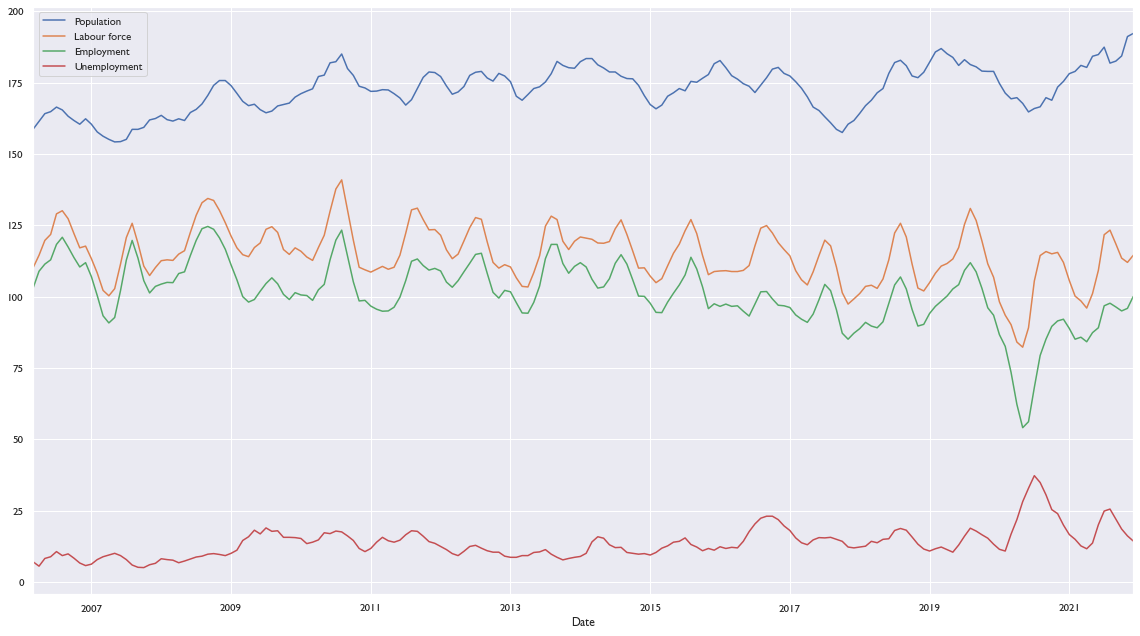

In [34]:
cal_15to24_pivot[['Population','Labour force', 'Employment','Unemployment']].plot(figsize = (16,9),kind='line')
plt.tight_layout()

<AxesSubplot:title={'center':'15-24 Unemployment Rate, Calgary CMA'}, xlabel='Date'>

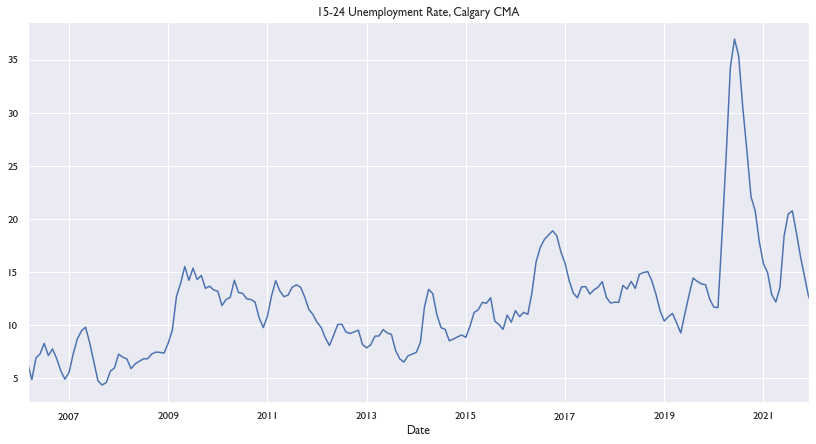

In [35]:
cal_15to24_pivot['Unemployment Rate'].plot(figsize=(14,7), title='15-24 Unemployment Rate, Calgary CMA')


In [36]:
vacancy = sc.table_to_df('14-10-0325')


In [37]:
vacancy=vacancy.rename({'REF_DATE':'Date'},axis=1)
cal_jwvs=vacancy[vacancy['GEO']=='Calgary, Alberta']
cal_jwvs=cal_jwvs.filter(items = ['Date','Statistics','SCALAR_FACTOR','UOM', 'VALUE','STATUS'])
cal_jwvs_pivot = cal_jwvs.pivot(index='Date', columns = 'Statistics',values ='VALUE')

C:\Users\Maln\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Maln\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Maln\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Maln\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is

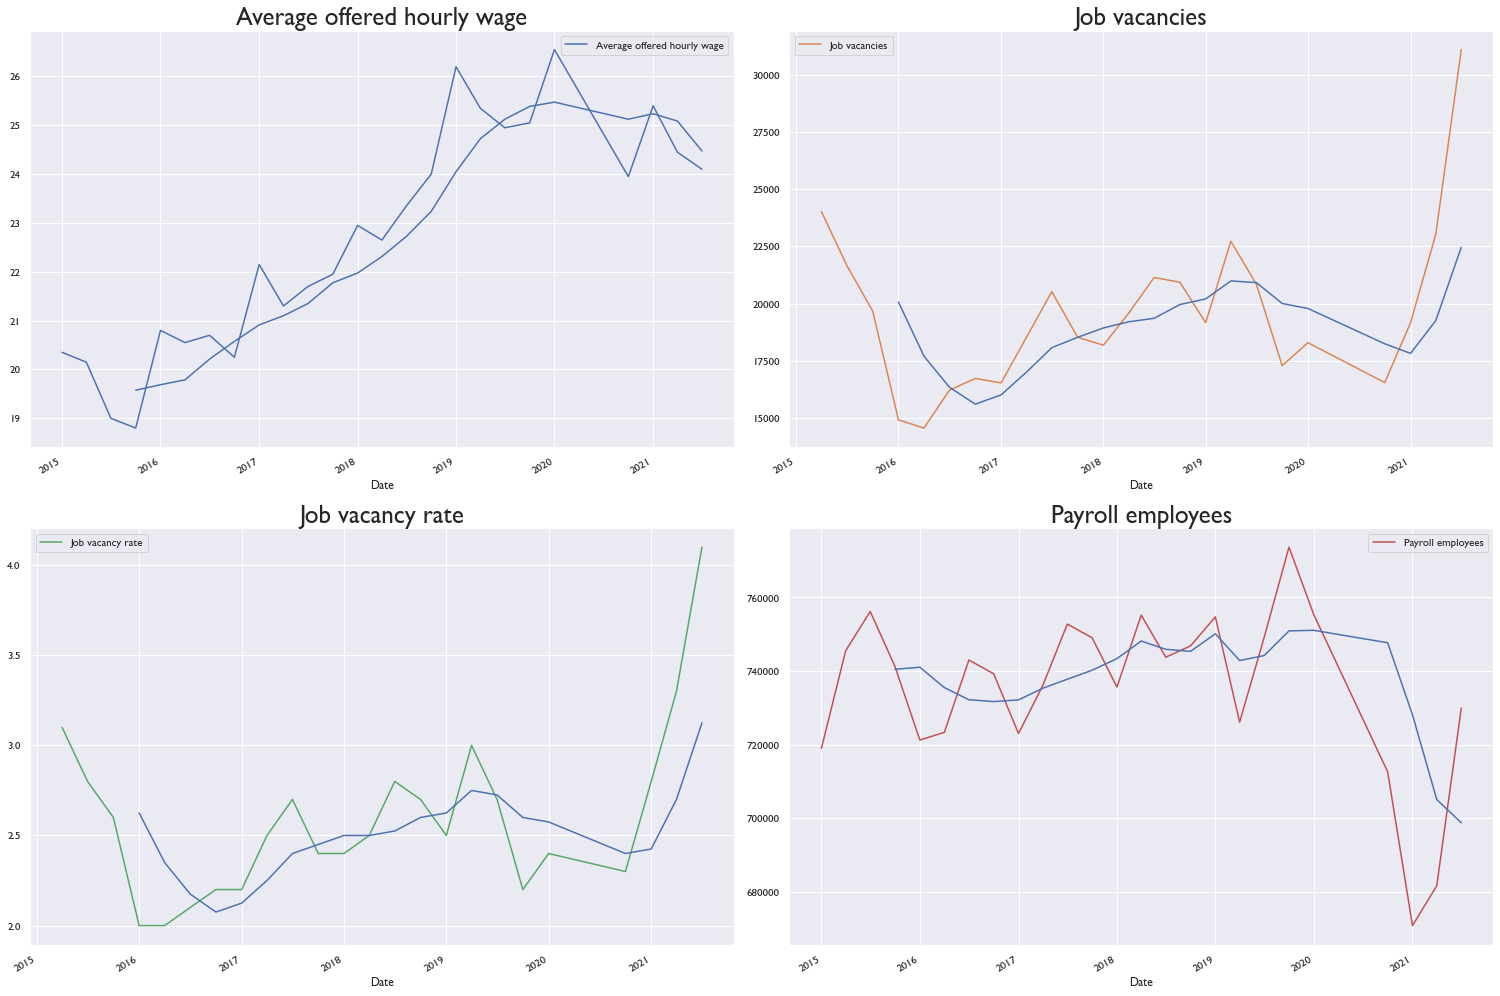

In [54]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(21,14))


cal_jwvs_pivot.plot(ax= axes,subplots=True)
cal_jwvs_pivot.rolling(4).mean().iloc[:,0].plot(ax=axes[0][0])
cal_jwvs_pivot.rolling(4).mean().iloc[:,1].plot(ax=axes[0][1])
cal_jwvs_pivot.rolling(4).mean().iloc[:,2].plot(ax=axes[1][0])
cal_jwvs_pivot.rolling(4).mean().iloc[:,3].plot(ax=axes[1][1])
axes[0][0].set_title(cal_jwvs_pivot.columns[0],fontsize=25)
axes[0][1].set_title(cal_jwvs_pivot.columns[1],fontsize=25)
axes[1][0].set_title(cal_jwvs_pivot.columns[2],fontsize=25)
axes[1][1].set_title(cal_jwvs_pivot.columns[3],fontsize=25)
plt.tight_layout()
plt.savefig('calgary_jwvs.png',dpi=300)